<a href="https://colab.research.google.com/github/Mohan75489/DeepLearning_PyTorch/blob/main/PyTorch_MNIST_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all required libraries
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#downloading training dataset
dataset = MNIST(root = 'data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
#to check the loaded dataset length
len(dataset)

60000

In [4]:
#checking test data length and we don't want to train using this. This is only for showing efficiency of built model.
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
#checking a random sample
dataset[5]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F704B365A10>, 2)

- First part is image. It's part of a python library is called Pillow (python interpreted of image)
- Second part, is the size of the image.
-Third part, is the label/value in the image.

In [6]:
#to view the image, importing matplotlib
import matplotlib.pyplot as plt
#to show plots in the notebook, instead of pop-up (anything that begins with % sign is called magic command)
%matplotlib inline 

Label: 3


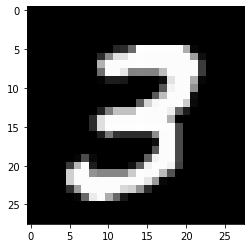

In [7]:
#plotting an image from the dataset. Note image and lable properties of image in dataset.
image, label = dataset[7]
plt.imshow(image, cmap='gray')
print('Label:',label)

In [8]:
#PyTorch operates in tensors, it doesn't know images. It requires transformation of images to tensors.
import torchvision.transforms as transforms

In [9]:
#tranforming dataset to tensors for training, and redefining it. and making it available for training.
dataset = MNIST(root = 'data/', train=True, transform = transforms.ToTensor())

In [10]:
#printing tranformed tensor to view shape
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


- Image is converted into 3D tensor, 1 represents colour, 28 and 28 represent x and y dimension.
- So, each pixel is conveted into an element of tensor.
- First one is colour channel, for colured image it have 3 parts (Red, Green, Blue).

In [11]:
#looking a some pixels from a specific image.
print(img_tensor[:,10:15,10:15])
#To understand colour variation. 
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


- Element represent colur of pixel.
- 1 is for Black and 0 is for White, everything in between are shades of gray.

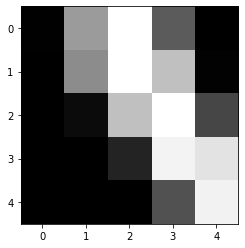

In [63]:
#plotting a 10-15 vertical and horizontal elements of tensor
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [13]:
#splitting the data into 3 sets.
#training dataset, some 50000 images of 60000.
#validation dataset, remaining 10000 images of 60000.
#test dataset, which is given separately in MNIST, 10000.

#splitting 60000 between training and validation set randomly.
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
#dataloding in batches, training dataset with shuffle on. Validation set no shuffling needed, at least for now.
from torch.utils.data import DataLoader
#smaller batches reduces time to calculate gradients.
batch_size = 125
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

- nn.linear expects vector input as 2D tensor.
- Each image is group of pixels/element in the tensor.
- Other way of saying above point, number of inputs=number of pixels in image.
- All images in MNIST are 28x28 pixels (or) 784 inputs.
- We are predicting which class the image belongs to (0-9) (or) output would be
a tensor with 10 elements (10 outputs).

In [15]:
#creating a model.
import torch.nn as nn
input_size = 28*28
num_classes = 10
#logestic-regression model for a image.
model = nn.Linear(input_size, num_classes)

In [16]:
#printing model weight shape.
print(model.weight.shape)
#printing intial weight tensor.
print(model.weight)
#printing model bias shape.
print(model.bias.shape)
#printing initial bias tensor.
model.bias

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0334, -0.0333,  0.0009,  ..., -0.0274, -0.0289, -0.0185],
        [-0.0294, -0.0357, -0.0151,  ..., -0.0003,  0.0206, -0.0287],
        [-0.0147, -0.0292, -0.0058,  ...,  0.0126,  0.0276,  0.0047],
        ...,
        [-0.0242,  0.0020, -0.0056,  ..., -0.0162, -0.0012,  0.0171],
        [ 0.0146, -0.0184,  0.0067,  ...,  0.0321,  0.0228, -0.0145],
        [ 0.0031,  0.0010,  0.0076,  ...,  0.0228, -0.0106,  0.0148]],
       requires_grad=True)
torch.Size([10])


Parameter containing:
tensor([ 0.0246,  0.0243, -0.0280,  0.0142,  0.0034,  0.0175,  0.0306, -0.0080,
        -0.0242, -0.0304], requires_grad=True)

In [17]:
#passing image to developed model in batches.
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([4, 6, 0, 8, 8, 3, 2, 8, 2, 2, 1, 9, 4, 4, 3, 1, 5, 3, 8, 5, 1, 1, 2, 0,
        4, 0, 9, 2, 9, 8, 0, 8, 3, 7, 7, 1, 8, 2, 6, 7, 7, 5, 3, 1, 2, 5, 8, 1,
        9, 9, 3, 2, 5, 4, 4, 2, 7, 0, 3, 5, 5, 3, 5, 6, 7, 5, 3, 1, 5, 0, 1, 9,
        1, 4, 0, 9, 6, 0, 8, 6, 0, 6, 2, 7, 2, 8, 5, 7, 0, 1, 3, 7, 3, 0, 8, 5,
        9, 8, 9, 5, 5, 2, 2, 6, 7, 1, 7, 0, 3, 1, 0, 4, 4, 5, 7, 9, 4, 7, 5, 0,
        4, 3, 5, 0, 6])
torch.Size([125, 1, 28, 28])


RuntimeError: ignored

- We followed same procedure as linear regression, but error occured because we are asking linear regression for "125" or batch size times.
- We know each image has 784 inputs and 10 outputs.
- We discussed nn.lineaar can handle 2D tensors only.

In [19]:
#target is to rehape input/images to 2D tensor.
#we can use reshape operation of tensor.
images.reshape(125,784).shape

torch.Size([125, 784])

- It is not practical to do it/pass it for each different batch sizes. User can give any batch sie.
- Technique is to extend existing nn.Module calss to add customized classes to work in this notebook.

In [20]:
#Adding customized class extension for nn.Module.
class MnistModel(nn.Module):
  #Constructor of class init
  #self is current batch. default fuction.
  #special line to make init is calss under nn.Module
    def __init__(self): #double underscore structure is important.
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    #init class function
    def forward(self,xb):
          #-1 is the key here, based on passed bacth size it can autocaculate it. 
          #limitation is we need to give inputs/should know image size.
          xb = xb.reshape(-1,784)
          out = self.linear(xb)
          return out

#redefining the model to this Mnistmodel
model = MnistModel()

In [21]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0070, -0.0028, -0.0070,  ..., -0.0348,  0.0053,  0.0093],
         [ 0.0046, -0.0112, -0.0138,  ...,  0.0094, -0.0345,  0.0007],
         [-0.0201, -0.0224, -0.0244,  ...,  0.0207,  0.0267, -0.0291],
         ...,
         [ 0.0162, -0.0136, -0.0070,  ..., -0.0298,  0.0305,  0.0038],
         [ 0.0064,  0.0209, -0.0235,  ..., -0.0346,  0.0046,  0.0282],
         [ 0.0120,  0.0207, -0.0254,  ...,  0.0248,  0.0224, -0.0256]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0076,  0.0020, -0.0227,  0.0287,  0.0127,  0.0142, -0.0094, -0.0230,
          0.0347,  0.0086], requires_grad=True)]

In [22]:
#passing images to built model
for images, labels in train_loader:
    outputs = model(images) #prints probabilities of each class
    print(images.shape)
    break
print('outputs.shape:',outputs.shape)
print('Sample outputs:\n',outputs[:2].data)

torch.Size([125, 1, 28, 28])
outputs.shape: torch.Size([125, 10])
Sample outputs:
 tensor([[ 0.0646,  0.0033,  0.0681,  0.1848, -0.0538, -0.0390, -0.0473,  0.1406,
         -0.0707, -0.0689],
        [ 0.0709,  0.0293, -0.0928,  0.2768, -0.2528,  0.2266, -0.2150,  0.1610,
         -0.1659, -0.0723]])


- These probabilities are not mathametically correct.
- Probability cannot be -ve.
- Sum of probabiliites is 1.
- SoftMax function S = e^prob/sum(e^prob).
- SoftMax also pushes highest probability towards 1.

In [23]:
#importing functional module
import torch.nn.functional as F

In [25]:
#printing outputs
outputs[:3]

tensor([[ 0.0646,  0.0033,  0.0681,  0.1848, -0.0538, -0.0390, -0.0473,  0.1406,
         -0.0707, -0.0689],
        [ 0.0709,  0.0293, -0.0928,  0.2768, -0.2528,  0.2266, -0.2150,  0.1610,
         -0.1659, -0.0723],
        [ 0.0184, -0.0412,  0.0210,  0.1942, -0.3555, -0.1015, -0.1139,  0.4070,
         -0.2714, -0.1897]], grad_fn=<SliceBackward0>)

In [26]:
#Applying softmax for rach output row/image output
probs = F.softmax(outputs,dim=1)
#printing probabilities of first 3 image outputs
print("Sample probabilities:\n",probs[:3].data)
#for check: adding up probabilities of a image outputs
print("Sum:",torch.sum(probs[3]).item())

Sample probabilities:
 tensor([[0.1043, 0.0981, 0.1047, 0.1177, 0.0927, 0.0941, 0.0933, 0.1126, 0.0911,
         0.0913],
        [0.1060, 0.1017, 0.0900, 0.1303, 0.0767, 0.1239, 0.0797, 0.1160, 0.0837,
         0.0919],
        [0.1039, 0.0979, 0.1042, 0.1239, 0.0715, 0.0922, 0.0910, 0.1533, 0.0778,
         0.0844]])
Sum: 1.0


- Softmax sum gives near values of 1, if not exact.
- Note: model is only 11.77% sure that first image is 3. Not great!!!

In [27]:
preds = torch.max(probs,dim=1)
print(preds)

torch.return_types.max(
values=tensor([0.1177, 0.1303, 0.1533, 0.1484, 0.1407, 0.1366, 0.1278, 0.1250, 0.1275,
        0.1305, 0.1535, 0.1350, 0.1286, 0.1459, 0.1441, 0.1341, 0.1535, 0.1243,
        0.1231, 0.1335, 0.1199, 0.1277, 0.1295, 0.1158, 0.1170, 0.1284, 0.1167,
        0.1193, 0.1303, 0.1263, 0.1378, 0.1422, 0.1325, 0.1331, 0.1425, 0.1463,
        0.1665, 0.1215, 0.1308, 0.1592, 0.1208, 0.1255, 0.1182, 0.1411, 0.1191,
        0.1495, 0.1361, 0.1514, 0.1290, 0.1205, 0.1212, 0.1506, 0.1490, 0.1503,
        0.1346, 0.1233, 0.1282, 0.1300, 0.1281, 0.1528, 0.1537, 0.1277, 0.1776,
        0.1532, 0.1285, 0.1452, 0.1421, 0.1564, 0.1311, 0.1377, 0.1602, 0.1277,
        0.1423, 0.1700, 0.1211, 0.1419, 0.1138, 0.1307, 0.1675, 0.1247, 0.1207,
        0.1450, 0.1462, 0.1279, 0.1215, 0.1214, 0.1407, 0.1617, 0.1201, 0.1501,
        0.1285, 0.1432, 0.1167, 0.1239, 0.1358, 0.1313, 0.1298, 0.1371, 0.1509,
        0.1234, 0.1355, 0.1129, 0.1300, 0.1156, 0.1336, 0.1147, 0.1176, 0.1526,
        0

In [28]:
#auto-assigns values to max_probs and indices to preds
max_probs, preds = torch.max(probs, dim=1)
print(preds) #outputs of model
print(max_probs)
print(labels) #actual values

tensor([3, 3, 7, 7, 7, 3, 7, 3, 7, 3, 7, 3, 5, 3, 7, 7, 7, 7, 6, 7, 3, 7, 7, 7,
        3, 5, 7, 3, 7, 3, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 0, 7, 3, 7,
        7, 3, 7, 7, 7, 7, 7, 7, 5, 3, 7, 7, 7, 5, 7, 7, 7, 7, 7, 1, 3, 7, 7, 5,
        7, 7, 2, 7, 3, 3, 7, 2, 7, 0, 3, 7, 3, 7, 3, 7, 7, 7, 2, 7, 7, 3, 7, 3,
        7, 3, 7, 1, 3, 2, 7, 7, 7, 0, 3, 3, 0, 7, 7, 3, 7, 3, 7, 2, 7, 7, 7, 5,
        7, 7, 7, 7, 7])
tensor([0.1177, 0.1303, 0.1533, 0.1484, 0.1407, 0.1366, 0.1278, 0.1250, 0.1275,
        0.1305, 0.1535, 0.1350, 0.1286, 0.1459, 0.1441, 0.1341, 0.1535, 0.1243,
        0.1231, 0.1335, 0.1199, 0.1277, 0.1295, 0.1158, 0.1170, 0.1284, 0.1167,
        0.1193, 0.1303, 0.1263, 0.1378, 0.1422, 0.1325, 0.1331, 0.1425, 0.1463,
        0.1665, 0.1215, 0.1308, 0.1592, 0.1208, 0.1255, 0.1182, 0.1411, 0.1191,
        0.1495, 0.1361, 0.1514, 0.1290, 0.1205, 0.1212, 0.1506, 0.1490, 0.1503,
        0.1346, 0.1233, 0.1282, 0.1300, 0.1281, 0.1528, 0.1537, 0.1277, 0.1776,
        0.1532, 

In [29]:
#how many out of given batch correctly predicted
torch.sum(preds==labels)

tensor(14)

- We need to evaluate model while it's training.
- Finding accuracy (how many images are predicted correct) is good way to do that.

In [30]:
#how much percentage accurate the model is predicting
def accuracy(outputs,labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [31]:
#current accuracy percentage
accuracy(outputs,labels)

tensor(0.1120)

- Accuracy gives percpective about how many images are predicted correctly, but it disregards remaining images from the batch.
- Even torch max picks only the highest prob value as prediction, but it is not always correct.
- From above two points, it is clear that these two functions are not helpful to give feedback to model.
- But this is helpful metrics, to make user/human uderstand the model performance.
- Since torch.max and accuracy disregards some values from outputs we can't do gradient on those.

We need to define a loss function which can be gradable and gives correct feedback to model.

## cross_entropy as loss fuction
What it does is,
- It picks max probability for each value and applies logerthm to it.
- Then it multiplies the value with (-1).
- from above 2 steps, We can get what is the loss for each image.
- Average of the losses will be calculated for batch, to get model loss.
How it works???
- log(1) = 0 and log(decimal) is high negative values always. Best probability is 1 and worst is 0.
- If model is confident loss will be zero otherwise huge negative value.
- we multiply with (-1) to get it positive.

Key Note: cross_entropy fuction of torch auto-calculates probability for outputs, so only outputs should be passed to it. (no need to do SoftMax)

In [32]:
loss_fn = F.cross_entropy

In [33]:
#defining and printing intial loss
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3137, grad_fn=<NllLossBackward0>)


## Idea of generic 'fit' function.
- Each time some steps are generic. We need to build a genric fuction to accomodate that.
- Functions used in this fit functions are defined specifically for this model, susequently.

In [34]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr) #updating weights and biases
    history = [ ] #for collecting epoch-wise results

    for epoch in range(epochs):
        #training phase
        for batch in train_loader:
            loss = model.training_step(batch)  #training_step is a function to be defined
            loss.backward() #finding gradients
            optimizer.step()
            optimizer.zero_grad() #setting gradients to zero
        #validation phase
        result = evaluate(model, val_loader) #evaluate is a function to be defined
        model.epoch_end(epoch, result)  #epoch_end to be defined
        history.append(result)
    return history

- epochs, lr, opt_func, batch_size are called hyper parameters, which developer need to choose.
- Choosing correct hyper parameters itself an research.

In [35]:
#defining evaluate function
def evaluate(model, val_loader):
  #list comprehension -> modifying existing list
    outputs = [model.validation_step(batch) for batch in val_loader] #validation_step function need to be defined
    return model.validation_epoch_end(outputs) #validation_epoch_end function need to be deifned

In [36]:
#re-defining MnistModel class
class MnistModel(nn.Module):
  #Constructor of class init
  #self is current batch. default fuction.
  #special line to make init is calss under nn.Module
    def __init__(self): #double underscore structure is important.
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    #init class function
    def forward(self,xb):
          #-1 is the key here, based on passed bacth size it can autocaculate it. 
          #limitation is we need to give inputs/should know image size.
          xb = xb.reshape(-1,784)
          out = self.linear(xb)
          return out
    def training_step(self, batch): #model and batch (training) is passed
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    def validation_step(self, batch): #model and batch (validation) is passed
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss' : loss, 'val_acc' : acc} #dictionary of val_loss and val_acc for a batch

    #gathering and finding mean for all batches validation set
    def validation_epoch_end(self, outputs): #model and outputs of validation_step are passed
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss':epoch_loss.item(),'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result): #model and results of validation_epoch_end are passed
        print("Epoch [{}] , val_loss: {:.4f} , vall_acc:: {:.4f}".format(epoch, result['val_loss'],result['val_acc']))

#setting model as this MnistModel
model = MnistModel()

In [37]:
#evaluation model on validation set for the first time
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.08559999614953995, 'val_loss': 2.3103623390197754}

In [38]:
history1 = fit(5, 0.002, model, train_loader, val_loader)

Epoch [0] , val_loss: 1.6620 , vall_acc:: 0.7511
Epoch [1] , val_loss: 1.3091 , vall_acc:: 0.7905
Epoch [2] , val_loss: 1.1029 , vall_acc:: 0.8086
Epoch [3] , val_loss: 0.9713 , vall_acc:: 0.8217
Epoch [4] , val_loss: 0.8804 , vall_acc:: 0.8302


In [39]:
history2 = fit(5, 0.002, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.8138 , vall_acc:: 0.8357
Epoch [1] , val_loss: 0.7628 , vall_acc:: 0.8399
Epoch [2] , val_loss: 0.7225 , vall_acc:: 0.8451
Epoch [3] , val_loss: 0.6897 , vall_acc:: 0.8491
Epoch [4] , val_loss: 0.6622 , vall_acc:: 0.8528


In [40]:
history3 = fit(10, 0.0005, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.6561 , vall_acc:: 0.8543
Epoch [1] , val_loss: 0.6502 , vall_acc:: 0.8555
Epoch [2] , val_loss: 0.6446 , vall_acc:: 0.8561
Epoch [3] , val_loss: 0.6391 , vall_acc:: 0.8569
Epoch [4] , val_loss: 0.6339 , vall_acc:: 0.8578
Epoch [5] , val_loss: 0.6288 , vall_acc:: 0.8581
Epoch [6] , val_loss: 0.6239 , vall_acc:: 0.8586
Epoch [7] , val_loss: 0.6192 , vall_acc:: 0.8590
Epoch [8] , val_loss: 0.6147 , vall_acc:: 0.8600
Epoch [9] , val_loss: 0.6103 , vall_acc:: 0.8603


In [41]:
history4 = fit(10, 0.0005, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.6060 , vall_acc:: 0.8611
Epoch [1] , val_loss: 0.6019 , vall_acc:: 0.8614
Epoch [2] , val_loss: 0.5979 , vall_acc:: 0.8620
Epoch [3] , val_loss: 0.5941 , vall_acc:: 0.8627
Epoch [4] , val_loss: 0.5903 , vall_acc:: 0.8631
Epoch [5] , val_loss: 0.5867 , vall_acc:: 0.8636
Epoch [6] , val_loss: 0.5832 , vall_acc:: 0.8643
Epoch [7] , val_loss: 0.5798 , vall_acc:: 0.8645
Epoch [8] , val_loss: 0.5764 , vall_acc:: 0.8649
Epoch [9] , val_loss: 0.5732 , vall_acc:: 0.8654


In [42]:
history5 = fit(5, 0.0004, model, train_loader, val_loader)

Epoch [0] , val_loss: 0.5707 , vall_acc:: 0.8659
Epoch [1] , val_loss: 0.5682 , vall_acc:: 0.8660
Epoch [2] , val_loss: 0.5658 , vall_acc:: 0.8664
Epoch [3] , val_loss: 0.5634 , vall_acc:: 0.8667
Epoch [4] , val_loss: 0.5611 , vall_acc:: 0.8669


Text(0.5, 1.0, 'Accuracy vs. No of Epochs')

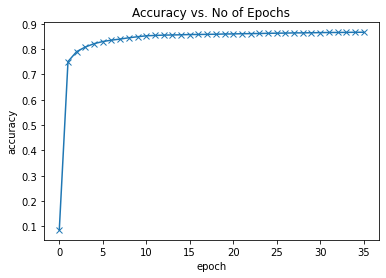

In [45]:
#collecting accuarcies of validation runs and plotting
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No of Epochs')

## Testing the model
- using test dataset, which model has never seen so far.
- will take tricky images to show model is not accurate.
- Why model is not accurate? -> We just took pixel brightness in to account to predict the number, but pixel relation not accounted in this model.

In [46]:
#defining test dataset
test_dataset = MNIST(root = 'data/', train=False, transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 6


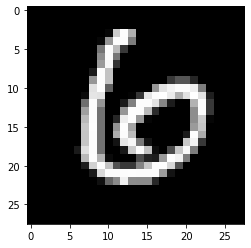

In [47]:
#sample image from test dataset
img, label = test_dataset[11]
plt.imshow(img[0], cmap = 'gray')
print('Shape:',img.shape)
print("Label:",label)

In [48]:
#built model can work with batches only. unsqueeze will add one dimension to taken image.
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 , Predicted Label: 7


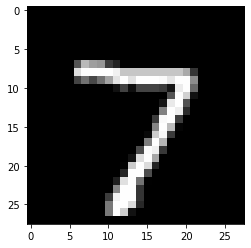

In [49]:
#doing first prediction
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 6 , Predicted Label: 6


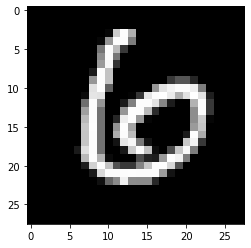

In [50]:
img, label = test_dataset[11]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 5 , Predicted Label: 5


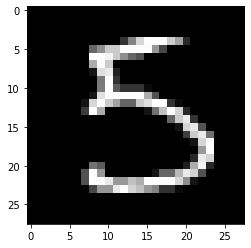

In [51]:
img, label = test_dataset[15]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 5 , Predicted Label: 5


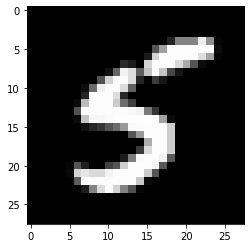

In [52]:
img, label = test_dataset[155]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 0 , Predicted Label: 0


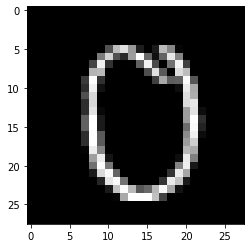

In [53]:
img, label = test_dataset[1775]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

Label: 9 , Predicted Label: 7


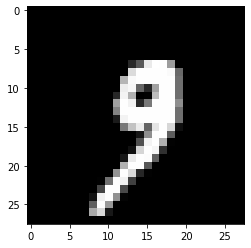

In [54]:
img, label = test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted Label:', predict_image(img,model))

- Prediction wrong.

In [55]:
test_loader = DataLoader(test_dataset, batch_size = 255)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8746702075004578, 'val_loss': 0.5392734408378601}

- Very Good result on test dataset.
- Model accracy on validation dataset = 86.69%
- Model accracy on test dataset = 87.47%

## Saving weights and biases to disc
- colab shuts down also it will be with files

In [56]:
#seeing optimized wwights and biases
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0139, -0.0119, -0.0129,  ..., -0.0192, -0.0041,  0.0287],
                      [-0.0002, -0.0011,  0.0302,  ...,  0.0063,  0.0312,  0.0190],
                      [-0.0246, -0.0200,  0.0189,  ...,  0.0309, -0.0196, -0.0121],
                      ...,
                      [-0.0261, -0.0342,  0.0293,  ...,  0.0325, -0.0297,  0.0092],
                      [-0.0003, -0.0333, -0.0340,  ...,  0.0013,  0.0068,  0.0074],
                      [-0.0052, -0.0221, -0.0163,  ..., -0.0015, -0.0252,  0.0115]])),
             ('linear.bias',
              tensor([-0.0518,  0.0995, -0.0058, -0.0048,  0.0304,  0.0812, -0.0403,  0.0221,
                      -0.1455,  0.0028]))])

In [57]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [58]:
model2 = MnistModel()

In [59]:
#loading saved weights and biases to new model
model2.load_state_dict(torch.load('mnist-logistic.pth'))
#printing model2 initial weights and biases
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0139, -0.0119, -0.0129,  ..., -0.0192, -0.0041,  0.0287],
                      [-0.0002, -0.0011,  0.0302,  ...,  0.0063,  0.0312,  0.0190],
                      [-0.0246, -0.0200,  0.0189,  ...,  0.0309, -0.0196, -0.0121],
                      ...,
                      [-0.0261, -0.0342,  0.0293,  ...,  0.0325, -0.0297,  0.0092],
                      [-0.0003, -0.0333, -0.0340,  ...,  0.0013,  0.0068,  0.0074],
                      [-0.0052, -0.0221, -0.0163,  ..., -0.0015, -0.0252,  0.0115]])),
             ('linear.bias',
              tensor([-0.0518,  0.0995, -0.0058, -0.0048,  0.0304,  0.0812, -0.0403,  0.0221,
                      -0.1455,  0.0028]))])